# 1
## Difference between Standard Error and Standard Deviation
- Standard Deviation(SD): 
Describes how spread out the individual data points are from the mean of the original dataset. Gives an idea of the variability in the dataset itself. 

- Standard Error of the Mean(SEM): 
Describes how much the sample mean is expected to vary from the population mean(= average of a group characteristic) if we repeatedly sampled from the population. Shows how precise the sample mean is as an estimate of the population mean. 

In terms of bootstrapping, when we generate multiple bootstrapped samples and compute the mean individually:
- SD of those means == Standard Error
- Tells us how much the sample vary

## Distinct Ideas Captured by Standard Error and Standard Deviation
- Standard Deviation:
Captures the spread of the data within a single dataset(the variability of the individual data points)

- Standard Error:
Captures the variability of the sample mean across multiple resamplings(deals with estimating the true population mean)

## Boostrapping
- Method to create multiple resamples of the original dataset by sampling with replacement
1. Create a Boostrapped Datasets
2. Calculate a Statistic
3. Repeat the Process
4. Create a Distribution
5. Confidence Intervals

# ChatGPT Summary
## Question 1
Here's a summary of our interaction:

1. **Difference between Standard Error and Standard Deviation**:
   - **Standard Deviation** measures how spread out individual data points are from the mean in the original dataset.
   - **Standard Error** measures how much the sample mean would vary if we repeatedly sampled from the population, focusing on the precision of the sample mean.

2. **Distinct Ideas**:
   - **Standard Deviation** captures the variability within a single dataset, while **Standard Error** captures the variability of the sample mean across multiple samples.
   
3. **Bootstrapping Process**:
   - Bootstrapping creates new datasets by randomly sampling from the original data with replacement.
   - We repeat this process many times to calculate a distribution of a statistic (e.g., mean or median), then use that distribution to estimate the **Standard Error** and **Confidence Interval**.


# 2
To create a 95% confidence interval using the standard error of the mean(SEM), which covers 95% of the bootstrapped sample means, we need to take 4 steps. 
1. Calculate the mean of the sample data
2. Find the standard error of the mean(SEM), which tells how much the sample mean is expected to vary
3. Multiply the SEM by approximately 2, to get the margin of error
4. Add and subtract the margin of error to/from the sample mean to create the confidence interval

# ChatGPT Summary
## Question 2
Here's a summary of our interaction based on your request:

---

**Summary of Interaction:**

In this discussion, I sought clarification on how the standard error of the mean (SEM) is used to create a traditional 95% confidence interval, not for theoretical purposes, but to contrast this method against bootstrapped confidence intervals, which are the focus of my class.

The explanation provided was as follows:

1. **Calculate the sample mean** of the data.
2. **Determine the standard error of the mean** (SEM), which indicates how much the sample mean varies from the true population mean.
3. **Multiply the SEM by approximately 2** (specifically, 1.96 for a 95% confidence level) to get the margin of error.
4. **Construct the confidence interval** by adding and subtracting this margin of error from the sample mean.

This traditional method gives a 95% confidence interval, which covers 95% of the potential sample means. This serves as a point of comparison for understanding bootstrapped confidence intervals.

---

This summary should provide a concise description of our conversation, highlighting the key aspects of the procedure you wanted to contrast for your assignment.

# 3
## Steps of Creating a 95% Bootstrapped Confidence Interval using Boostrapped Means
1. Generate many boostrapped samples from the original dataset
- Each sample must be the same size as the original sample
- Bootstrapped samples are created by sampling with repleacement from the original data

2. Calculate the mean of each bootstrapped sample to create a distribution of bootstrapped means

3. Use the np,quantile() function to find the lower and upper bounds of the 95% confidence interval. Use the 2.5th and 97.5th percentiles of the boostrapped means:
    Lower bound = np.quantile(bootstrapped_means, 0.025)
    Upper bound = np.quantile(bootstrapped_means, 0.975)
    
4. Interval between these two quantiles => represents the 95% bootstrapped confidence interval, and will cover exactly 95% of the bootstrapped sample means

# ChatGPT Summary
## Question 3
Here's a summary of our interaction based on your request:

---

**Summary of Interaction:**

In this discussion, I sought an explanation for how to create a 95% bootstrapped confidence interval using bootstrapped means, without relying on the standard error of the mean (SEM). The goal was to understand this procedure, contrasting it with the traditional "sample mean plus and minus about 2 times the standard error" method.

The explanation provided was:

1. **Generate bootstrapped samples** by resampling with replacement from the original dataset, keeping the same sample size as the original.
2. **Calculate the mean** for each bootstrapped sample to form a distribution of bootstrapped means.
3. **Use the `np.quantile()` function** to find the 2.5th and 97.5th percentiles of the bootstrapped means to form the lower and upper bounds of the confidence interval:
   - `Lower bound = np.quantile(bootstrapped_means, 0.025)`
   - `Upper bound = np.quantile(bootstrapped_means, 0.975)`
4. This gives a **95% bootstrapped confidence interval**, covering exactly 95% of the bootstrapped means.

This method provides a non-parametric way to estimate the variability of the sample mean without using the standard error.

# 4
## Code for Bootstrapped Confidence Interval for Mean

In [1]:
import numpy as np

# Sample data
data = np.random.randint(10, 100, size=30)  # Random sample of 30 values between 10 and 100

# Number of bootstrap samples
n_bootstraps = 10000

# Store bootstrap means
bootstrapped_means = []

# Bootstrapping process
for _ in range(n_bootstraps):
    # Create a bootstrapped sample (sampling with replacement)
    boot_sample = np.random.choice(data, size=len(data), replace=True)
    
    # Calculate and store the mean of the bootstrapped sample
    bootstrapped_means.append(np.mean(boot_sample))

# Compute the 95% bootstrapped confidence interval (for the mean)
lower_bound = np.quantile(bootstrapped_means, 0.025)
upper_bound = np.quantile(bootstrapped_means, 0.975)

# Display the confidence interval for the mean
print(f"95% Bootstrapped Confidence Interval for the Mean: [{lower_bound}, {upper_bound}]")


95% Bootstrapped Confidence Interval for the Mean: [55.766666666666666, 74.2]


## Steps to Modify for Other Population Parameters

In [2]:
# Store bootstrap medians
bootstrapped_medians = []

# Bootstrapping process
for _ in range(n_bootstraps):
    # Create a bootstrapped sample (sampling with replacement)
    boot_sample = np.random.choice(data, size=len(data), replace=True)
    
    # Calculate and store the median of the bootstrapped sample
    bootstrapped_medians.append(np.median(boot_sample))

# Compute the 95% bootstrapped confidence interval (for the median)
lower_bound_median = np.quantile(bootstrapped_medians, 0.025)
upper_bound_median = np.quantile(bootstrapped_medians, 0.975)

# Display the confidence interval for the median
print(f"95% Bootstrapped Confidence Interval for the Median: [{lower_bound_median}, {upper_bound_median}]")


95% Bootstrapped Confidence Interval for the Median: [53.0, 81.5]


## Explanation
1. Sample Creation: Create a random sample of 30 values
2. Bootstrap Sampling: For each 10,000 iterations, generate a new bootstrapped sample by sampling with replacement from the original data
3. Calculate Statistic: Calculate the mean for each bootstrapped sample and store these values in a list
4. Confidence Interval: Take the 2.5th and 97.5th percentiles of the stored means to get the 95% confidence interval => gives the range that covers 95% of the bootstrapped means

# ChatGPT Summary
## Question 4
Here's a summary of our interaction regarding creating a bootstrapped confidence interval:

---

**Summary of Interaction:**

In this discussion, I worked to create code for generating a 95% bootstrapped confidence interval for a population mean based on a sample dataset. I learned how to modify this code to apply to different population parameters, such as the median.

The code provided includes the following steps:

1. **Sample Creation**: A random sample of 30 values was generated using NumPy.
2. **Bootstrap Sampling**: A loop was set to create 10,000 bootstrapped samples by sampling with replacement from the original dataset.
3. **Statistic Calculation**: The mean of each bootstrapped sample was calculated and stored in a list.
4. **Confidence Interval Calculation**: The 2.5th and 97.5th percentiles of the bootstrapped means were computed using `np.quantile()` to create the 95% confidence interval.

Additionally, I learned how to modify the code to calculate the confidence interval for the median instead of the mean by changing the statistic calculation from `np.mean()` to `np.median()`.

This exercise helped deepen my understanding of bootstrapping and how to create confidence intervals for various statistics using this method.

---

Feel free to submit this summary as evidence for your assignment!

# 5 
We need to distinguish between the population parameter and the sample statistic because a population parameter is true, but unknown, value that we are trying to estimate such as population mean or median. In contrast, sample statistic is a calculated value based on our observed data sample, such as sample mean or sample median. Confidence intervals help us estimate the range within which the true population parameter likely falls, using the sample statistic. The sample statistic is highly subject to variability, so the confidence interval accounts for this uncertainity and provides a range for the population parameter.

## Goal of confidence intervals:
### To estimate a range within which the true population parameter likely falls, rather than treating the sample statistic as an exact value

# ChatGPT Summary
## Question 5
Here's a summary of our interaction based on your question:

---

**Summary of Interaction:**

In this discussion, I explored why it's important to distinguish between the population parameter and the sample statistic when working with confidence intervals. The key points covered were:

- **Population parameter**: This is the true, but unknown value we're trying to estimate (e.g., population mean, median).
- **Sample statistic**: This is a value calculated from the observed sample, serving as an estimate of the population parameter. We don't know if the sample statistic is true or false, but it's an approximation based on the sample.
- Confidence intervals provide a range within which the true population parameter likely falls, reflecting the uncertainty of the sample statistic due to natural variability in the sample.

The discussion also clarified that the sample statistic is not inherently true or false but is subject to variability depending on how well the sample represents the population.

# 6
## 1 Process of Bootstrapping
From the video I watched for Q1, I have learned that here are 4 steps of bootstrapping:
1. Make a Bootstrapped Dataset
2. Calculate something
3. Keep track of that calculation
4. Repeat steps 1 to 3 a bunch of times

More generally speaking, bootstrapping is a statistical method where you repeatedly resample your original data with replacement to create many "new" datasets, called bootstrapped samples. From the samples, you calculate the statistic that you are interested in for each one. This gives you a distribution of the statistic, which helps you understand how much that statistic might vary. To summarize, it's like taking your original sample and treating it as if it were the entire population, so you can simulate how different samples would behave. 
## 2 Main Purpose of Bootstrapping
The main purpose of bootstrapping is to estimate variability(or uncertainity) of a statistic without making assumptions about the population, like normality. It allows you to create confidence intervals for population parameters by looking at how much the sample statistic changes across many bootstrapped samples. To summarize, bootstrapping helps us figure out how accurate our estimate from the sample is by showing us the range of possible outcomes. 
## 3 How to Use Bootsrapping to Assess a Hypothesized Average
1. Create many boostrapped samples
2. Calculate the mean of each bootrapped sample
3. Create a confidence interval from the distribution of bootstrapped means
4. Compare the hypothesized average

# 7
## Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistics itself is not zero?
A confidence interval that includes zero suggests "fail to reject the null hypothesis" because it indicates that the data does not provide strong enough evidence to conclude that the population parameter is different from zero. 
Regardless of the sample mean itself being not zero, the confidence interval represents the range of every possible values for the true population mean, which accounts sample variability. If this interval spans zero, it suggests that zero could be a plausible value for the population mean. In other word, on average, the drug could have no effect.

To reject the null hypothesis, the confidence interval would need to exclude zero. This suggests that the sample data provides strong enough evidence that the population mean is likley not zero, meaning that the drug likely has an effect. This means that if zero is outside the confidence interval, it's unlikely that the true population mean is zero, and we would reject the hypothesis that the drug is doing nothing. 

### Key Takeaways
#### Failing to reject the null:
The confidence interval overlaps zero, meaning zero is a plausible value for the population mean. 
#### Rejecting the null:
The confidence interval exclues zero, meaning it's unlikely the population mean is zero, suggesting the drug has an effect.


# 8
## 1 Introduction and Hypothesis
#### Goal : To assess whether the vaccine created by AliTech has a positive effect on patients' health. 
#### Null Hypothesis(H₀): In this context, it means that the vaccine has no effect on health scores. In other words, any observed changes between the initial and final health scores could be due to random variation rather than the vaccine. 
#### Alternative Hypothesis: The alternative hypothesis(H₁) is that the vaccine does have an effect, meaning the final health scores should, generally, be higher than the initial health scores. 

## 2 Data Visualization
#### Compare InitialHealthScore and FinalHealthScore for the patients
#### Plot the histogram for each of the health scores to illustrate the distributions of both health scores. 

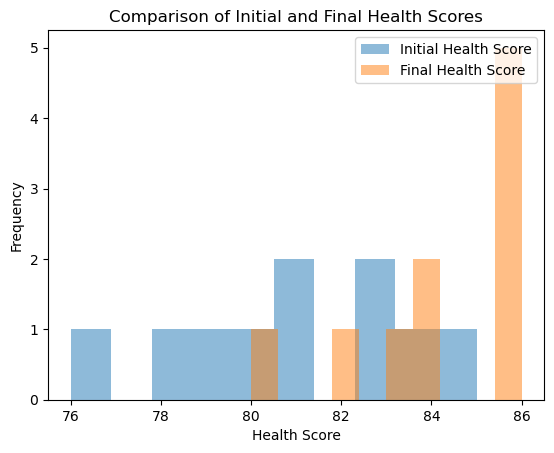

95% Confidence Interval for the mean score difference: [0.7, 5.5]
Reject the null hypothesis: The vaccine appears to have a positive effect on health scores.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the CSV file and handle incorrect column parsing (skip the header row)
df = pd.read_csv('alitech_vaccine_data.csv', header=None, skiprows=1)

# Step 2: Manually split the single column into multiple columns
df = df[0].str.split(',', expand=True)

# Step 3: Assign proper column names
df.columns = ['PatientID', 'Age', 'Gender', 'InitialHealthScore', 'FinalHealthScore']

# Step 4: Convert necessary columns to numeric types (as they might be read as strings)
df['InitialHealthScore'] = pd.to_numeric(df['InitialHealthScore'], errors='coerce')
df['FinalHealthScore'] = pd.to_numeric(df['FinalHealthScore'], errors='coerce')

# Step 5: Plot histograms to visualize Initial vs. Final Health Scores
plt.hist(df['InitialHealthScore'], alpha=0.5, label='Initial Health Score')
plt.hist(df['FinalHealthScore'], alpha=0.5, label='Final Health Score')
plt.legend(loc='upper right')
plt.xlabel('Health Score')
plt.ylabel('Frequency')
plt.title('Comparison of Initial and Final Health Scores')
plt.show()

# Step 6: Calculate the difference between Final and Initial health scores for each patient
df['ScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Step 7: Bootstrapping to calculate the confidence interval for the mean difference
np.random.seed(42)  # Ensure reproducibility

boot_means = []
for _ in range(1000):
    boot_sample = df['ScoreDifference'].sample(frac=1, replace=True)
    boot_means.append(boot_sample.mean())

# Step 8: Calculate 95% confidence interval for the bootstrapped means
ci_lower = np.percentile(boot_means, 2.5)
ci_upper = np.percentile(boot_means, 97.5)

# Step 9: Output the confidence interval
print(f'95% Confidence Interval for the mean score difference: [{ci_lower}, {ci_upper}]')

# Step 10: Conclusion regarding the null hypothesis of "no effect"
if ci_lower > 0:
    print("Reject the null hypothesis: The vaccine appears to have a positive effect on health scores.")
elif ci_upper < 0:
    print("Reject the null hypothesis: The vaccine appears to have a negative effect on health scores.")
else:
    print("Fail to reject the null hypothesis: No significant effect of the vaccine on health scores.")


## 3 Bootstrapping for Confidence Intervals
#### Use the bootstrapping technique to evaluate the difference between initial and final helath scores. Specifically, the mean difference between final and initial health scores will be calculated, and generate a 95% bootstrapped confidence interval. 

Code: 

In [9]:
# Step 6: Calculate the difference between Final and Initial health scores for each patient
df['ScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Step 7: Bootstrapping to calculate the confidence interval for the mean difference
np.random.seed(42)  # Ensure reproducibility

boot_means = []
for _ in range(1000):  # Generate 1000 bootstrap samples
    boot_sample = df['ScoreDifference'].sample(frac=1, replace=True)
    boot_means.append(boot_sample.mean())

# Step 8: Calculate 95% confidence interval for the bootstrapped means
ci_lower = np.percentile(boot_means, 2.5)
ci_upper = np.percentile(boot_means, 97.5)

# Step 9: Output the confidence interval
print(f'95% Confidence Interval for the mean score difference: [{ci_lower}, {ci_upper}]')


95% Confidence Interval for the mean score difference: [0.7, 5.5]


## 4 Quantitative Analysis
#### Calculate the mean difference in health scores and generate the confidence interval accurately. This quantitative assessment is crucial to draw the reliable conclusions. 

## 5 Interpretation of Results
#### The mean difference between the final and initial health scores is computed for each bootstrap sample.
#### The 95% confidence interval for the mean difference is determined by taking the 2.5th and 97.5th percentiles of the bootsrapped means.
#### We can derive the conclusions about whether the vaccine had an effect based on this interval.

## Conclusion Regarding Null Hypothesis:
#### Based on the confidence interval:
- If both the lower and upper bounds of the confidence interval are above 0, you could reject the null hypothesis. We can also conclude that the vaccine likely had a positive effect on health scores.

- If both bounds are below 0, you would reject the null hypothesis and conclude the vaccine had a negative effect.

- If the interval crosses 0(i.e., one bound is positive and the other is negative), then you failed to reject the null hypothesis, meaning there's insufficient evidence to claim that the vaccine had any effect. 

## 6 Final Step: Conclusion Example

In [10]:
# Step 10: Conclusion regarding the null hypothesis of "no effect"
if ci_lower > 0:
    print("Reject the null hypothesis: The vaccine appears to have a positive effect on health scores.")
elif ci_upper < 0:
    print("Reject the null hypothesis: The vaccine appears to have a negative effect on health scores.")
else:
    print("Fail to reject the null hypothesis: No significant effect of the vaccine on health scores.")


Reject the null hypothesis: The vaccine appears to have a positive effect on health scores.


## 7 Further Considerations:
#### Discuss the limitations of this analysis(e.g., small sample size).
#### Suggest next steps for AliTech, such as collecting more data or testing different dosage levels. 

# ChatGPT Summary
## Question 8
ChatGPT Interaction Summary
In this session, I sought assistance with a Vaccine Data Analysis Assignment for the company AliTech, which developed a new vaccine aimed at improving health outcomes. I provided a dataset with patient information, including initial and final health scores.

Data Import and Cleaning: I initially encountered issues importing and cleaning the dataset, specifically with parsing column headers. With guidance, I successfully imported the data, adjusted the headers, and converted necessary columns to numeric types.

Data Visualization: I generated histograms to compare the distributions of initial and final health scores, providing visual insights into the potential effects of the vaccine.

Bootstrapping Analysis: I learned to apply bootstrapping to assess the effectiveness of the vaccine. By calculating the 95% confidence interval for the mean difference in health scores, I was able to draw conclusions regarding the null hypothesis of "no effect."

Results Interpretation: The analysis indicated a significant positive effect of the vaccine, as the confidence interval did not include zero, leading to the rejection of the null hypothesis.

This interaction provided me with the necessary support to conduct a comprehensive analysis and draw meaningful conclusions for my assignment.

# 9
Yes